# Python for (open) Neuroscience

_Lecture 3.1_ - Introduction to Statistics and Machine learning in Pyhton

Luigi Petrucco

### Outlook

- This won't be a lecture on statistics! (I actually know very little)

 - We will see the most common modules for statistics that you can find in Python

### Descriptive statistics

#### Mean, median

In [1]:
import numpy as np

data = np.random.normal(0, 1, 1000)

print('Mean: {}'.format(np.mean(data)))
print('Median: {}'.format(np.median(data)))

Mean: 0.014923731803914009
Median: -0.005504838100977735


#### Standard deviation, variance

In [2]:
print(f'Standard deviation: {np.std(data)}')
print(f'Variance: {np.var(data)}')

Standard deviation: 0.9972842779689975
Variance: 0.9945759310841447


#### Percentiles

In [3]:
print(f' 95Perencile: {np.percentile(data, 95)}')

 95Perencile: 1.7122999146763072


## Statistical tests

The `scipy` module provides functions for pretty much any kind of classical statistics you might want to compute!

In [12]:
# In scipy we find many modules for scientific computing of all kinds.
# The module for statistics is stats:

import scipy.stats as stats

### One-sample tests

In [69]:
# One-sample t-test
data = np.random.normal(1, 1, 1000)

test_result = stats.ttest_1samp(data, 0)
test_result

TtestResult(statistic=30.929118150916977, pvalue=6.987299873140409e-148, df=999)

In [14]:
# One-sample Wilcoxon signed-rank test
stats.wilcoxon(data)

WilcoxonResult(statistic=248798.0, pvalue=0.8737165940269713)

### Two-sample t-test

In [3]:
data2 = np.random.normal(0, 1, 1000)

stats.ttest_ind(data, data2)

NameError: name 'np' is not defined

### Two-sample Wilcoxon rank-sum test

In [16]:
#Two-sample Wilcoxon rank-sum test
stats.ranksums(data, data2)

RanksumsResult(statistic=-2.0777234976131287, pvalue=0.03773483352982074)

## Paired samples

### Paired t-test

In [137]:
stats.ttest_rel(data, data2)

NameError: name 'data' is not defined

### Paired Wilcoxon signed-rank test

In [18]:
stats.wilcoxon(data, data2)

WilcoxonResult(statistic=229521.0, pvalue=0.023265500404451984)

## Normality tests

In [139]:
# Test normality of data
data = np.random.normal(0, 1, 1000)
stats.normaltest(data)

NormaltestResult(statistic=2.1246836120835866, pvalue=0.3456454272705334)

### QQ plots for normality tests

The visualization to look at normality is the quantile-quantile plot.
We can make QQ plots using `scipy.stats` and `matplotlib`:

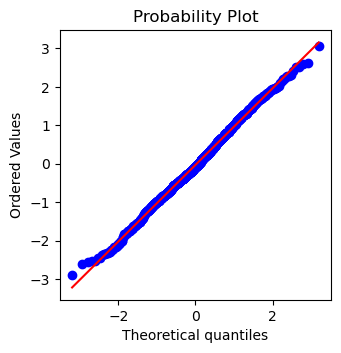

In [145]:
from matplotlib import pyplot as plt
# Here we pass to the `plot` argument the plotting library we want to use:
plt.figure(figsize=(3.5, 3.5))
stats.probplot(data, dist="norm", plot=plt)
plt.show()

### One-way ANOVA

In [19]:
data = np.random.normal(0, 1, 1000)
data2 = np.random.normal(0, 1, 1000)
data3 = np.random.normal(-1, 1, 1000)
stats.f_oneway(data, data2, data3)

F_onewayResult(statistic=376.52312949276285, pvalue=1.3219093996730449e-146)

### Correlation

PearsonRResult(statistic=0.0023291659125051524, pvalue=0.941358374267056)

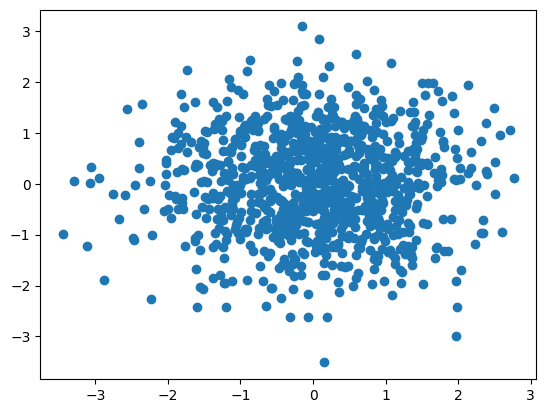

In [71]:
from matplotlib import pyplot as plt
data = np.random.normal(0, 1, 1000)
data2 = np.random.normal(0, 1, 1000)

plt.scatter(data, data2)
stats.pearsonr(data, data2)

PearsonRResult(statistic=0.7273542704293603, pvalue=2.276213597443335e-165)

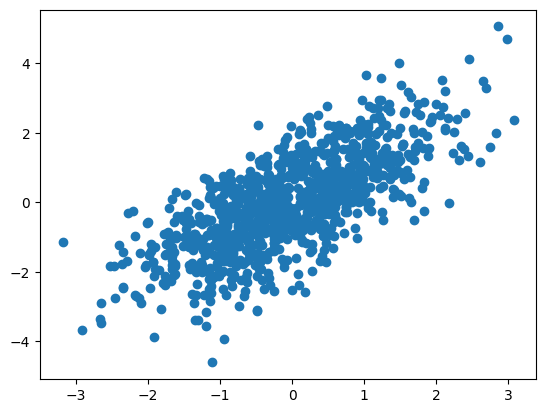

In [72]:
data = np.random.normal(0, 1, 1000)
data2 = data + np.random.normal(0, 1, 1000)

plt.scatter(data, data2)
stats.pearsonr(data, data2)

## Curve fitting

The `scipy.optimize` module offers the `curve_fit()` function to fit a given function to a set of datapoints.

Example:

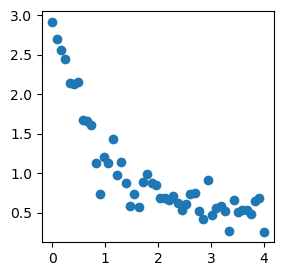

In [146]:
from scipy.optimize import curve_fit

# Generate data
x = np.linspace(0, 4, 50)
noise = 0.2 * np.random.normal(size=len(x))
ydata = 2.5 * np.exp(-1.3 * x) + 0.5 + noise

# plot the data
plt.figure(figsize=(3, 3))
plt.scatter(x, ydata, label='data')

In [147]:
# Define the function to fit:
def func_to_fit(x, a, b, c):
    return a * np.exp(-b * x) + c

In [148]:


# Fit the data
popt, pcov = curve_fit(func_to_fit, x, ydata)

# retrieved parameters
popt

array([2.50107936, 1.2829513 , 0.5150358 ])

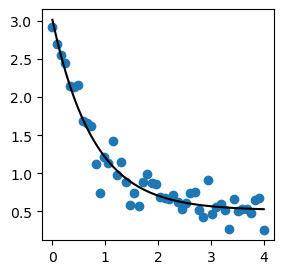

In [149]:
plt.figure(figsize=(3, 3))
plt.scatter(x, ydata, label='data')
plt.plot(x, func(x, popt[0], popt[1], popt[2]), c="k", label='fit')

In [151]:
# The pcov returned value gives us estimates over the uncertainty of the parameters
# that were fit:
pcov

array([[ 0.01025531,  0.00410255, -0.00057879],
       [ 0.00410255,  0.0129386 ,  0.00382472],
       [-0.00057879,  0.00382472,  0.00207825]])

(Practicals 3.2.0)

## More advanced statistics using statsmodels

The `statsmodels` module provides a more complete set of statistical tools, including:
- Linear models
- Generalized linear models
- Multivariate statistics
- ...

**Disclaimer**

Python is generally considered less powerful than R when it comes to advanced statistical models. I do not know much statistics, so I take the experts' opinion on this point!

I've also never used `statsmodels`.

### Linear models

In [152]:
# From the statsmodels tutorial:
import statsmodels.api as sm  # requires pip/conda install statsmodels
import statsmodels.formula.api as smf

data = sm.datasets.get_rdataset('Guerry', 'HistData').data
data = data[['Lottery', 'Literacy', 'Wealth', 'Region']].dropna()
data.head()

ModuleNotFoundError: No module named 'statsmodels'

In [153]:
model = smf.ols('Lottery ~ Literacy + Wealth + Region', data=data)
results = model.fit()

print(results.summary())

NameError: name 'smf' is not defined

# Machine learning: `scikit-learn`

`scikit-learn` is the library for machine learning pipelines. It includes functions/classes for: 
- data preprocessing (normalization, etc.)
- dataset splitting (iterations over train/test splits, etc.)
- dimensionality reduction
- clustering / (multi) linear regression
- More advanced methods: decision tree forests, support-vector machines...

In [1]:
# requires pip/conda install scikit-learn
from sklearn import preprocessing

## Data preprocessing

The most common data preprocessing tool is a scaler: an object that can be used to 
consistently scale data using consistent parameters.

In [155]:
import numpy as np 
X_train = np.array([[ 3.,   0.,   0.],
                    [ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

scaler = preprocessing.StandardScaler()
scaler  # this is just an object that describes a preprocessing step

StandardScaler()

In [157]:
# We call a method to fit the parameters we need for the preprocessing,
# namely, the mean and standard deviation:
scaler.fit(X_train)


StandardScaler()

In [158]:
print("Data means: ", scaler.mean_)

Data means:  [1.5  0.   0.25]


In [159]:
print("Data means: ", scaler.var_)

Data means:  [1.25   0.5    1.1875]


In [160]:
# We can now use the scaler and apply it to new data:

In [161]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[ 1.34164079,  0.        , -0.22941573],
       [-0.4472136 , -1.41421356,  1.60591014],
       [ 0.4472136 ,  0.        , -0.22941573],
       [-1.34164079,  1.41421356, -1.14707867]])

There are also many other scalers for max-min normalization (`MinMaxScaler`), etc. 

If you need to do histogram matching, there's very convenient methods for that as well (if you don't know what that is, you don't care).

# Dimensionality reduction

### Principal component analysis

Principal component analysis is implemented in the same object-oriented fashon:

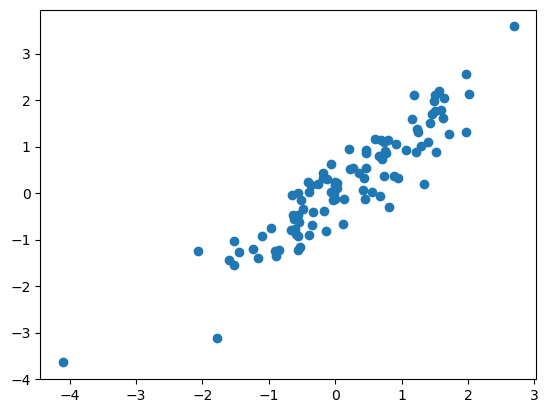

In [199]:
# A simple 2D dataset:
x = np.random.randn(100)
X = np.stack([x, x*1+np.random.randn(100)*0.5]).T

plt.figure()
plt.scatter(X[:, 0], X[:, 1])

In [196]:
np.std(X, 0)

array([1., 1.])

To find principal components, we use the PCA class to create a PCA decomposition object:

In [201]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # initialize a pca decomposition object from PCA class

# Before PCA we always have to normalize our data;
X = preprocessing.StandardScaler().fit_transform(X)

pca.fit(X)  # fit it calling a method
print(pca.explained_variance_ratio_)

[0.95928475 0.04071525]


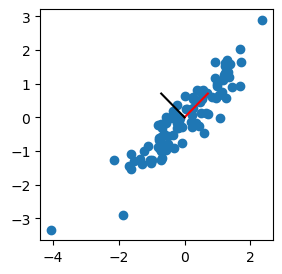

In [202]:
plt.figure(figsize=(3, 3)  )
plt.scatter(X[:, 0], X[:, 1])
plt.plot([0, pca.components_[0, 0]], [0, pca.components_[0, 1]], 'r')
plt.plot([0, pca.components_[1, 0]], [0, pca.components_[1, 1]], 'k')

To visualize the data in the new PCA space:

(-5.673543685317234,
 4.159356293038498,
 -0.8576227921080646,
 0.6737105946062456)

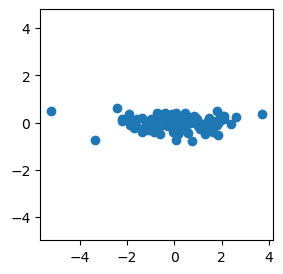

In [203]:
transformed = pca.transform(X)

plt.figure(figsize=(3, 3))
plt.scatter(transformed[:, 0], transformed[:, 1])
plt.axis("equal")

## Data splitting with `scikit-learn`

There are smart ways of splitting data into training and test sets:

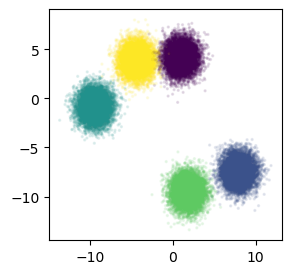

In [206]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50000, centers=5, n_features=5, random_state=3) # create an example dataset
plt.figure(figsize=(3, 3))
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.1, s=2)
plt.show()

The good way of doing clustering, regression, etc. is to always fit the parameters on a fraction of the data, and test their goodness on the other to avoid overfitting.

We can do it using the `train_test_split()` function:

In [209]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, 
                                                    test_size=0.1,  # fraction for testing
                                                    stratify=y, 
                                                    random_state=50)

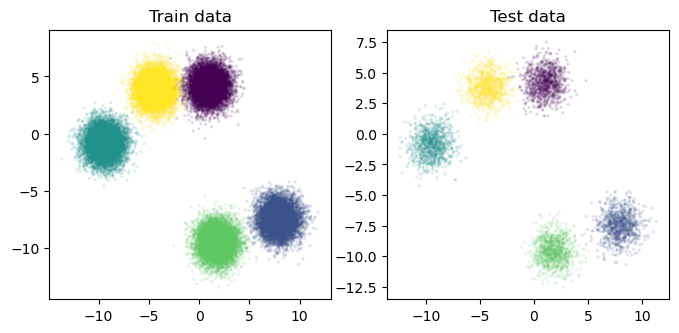

In [212]:
f, axs = plt.subplots(1, 2, figsize=(8, 3.5))
axs[0].scatter(X_train[:, 0], X_train[:, 1], c=Y_train, alpha=0.1, s=2)
axs[1].scatter(X_test[:, 0], X_test[:, 1], c=Y_test, alpha=0.1, s=2)

axs[0].set_title("Train data")
axs[1].set_title("Test data")
plt.show()

There are also tools to directly loop over multiple splits of the data to perform multiple iterations of our clustering/regression procedure:



In [214]:
from sklearn.model_selection import KFold

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [0, 2], [1, 2], [5, 2], [0, 1]])

kf = KFold(n_splits=4)
kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    print("train data :", X[train_index, :], "test data:", X[test_index, :])

train data : [[1 2]
 [3 4]
 [0 2]
 [1 2]
 [5 2]
 [0 1]] test data: [[1 2]
 [3 4]]
train data : [[1 2]
 [3 4]
 [0 2]
 [1 2]
 [5 2]
 [0 1]] test data: [[1 2]
 [3 4]]
train data : [[1 2]
 [3 4]
 [1 2]
 [3 4]
 [5 2]
 [0 1]] test data: [[0 2]
 [1 2]]
train data : [[1 2]
 [3 4]
 [1 2]
 [3 4]
 [0 2]
 [1 2]] test data: [[5 2]
 [0 1]]


# Data clustering

In [215]:
import numpy as np
X, y = make_blobs(n_samples=50000, centers=4, cluster_std=2,
                  n_features=2, random_state=10)  # Create clustered data


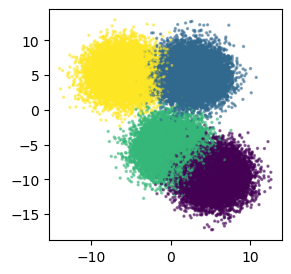

In [216]:
plt.figure(figsize=(3, 3))
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, s=2)

Here we implement K-Means clustering using the `KMeans` class from `sklearn.cluster`:

In [218]:
from sklearn.cluster import KMeans

# Split data in test and train:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=50)

kmeans = KMeans(init="k-means++", n_clusters=4, n_init=10, random_state=4)
kmeans.fit(X_train)  # fit the cluster classifier on train data

# Use the fit model to predict new data:
Y_predicted = kmeans.predict(X_test)

Text(0.5, 1.0, 'Predicted test clusters:')

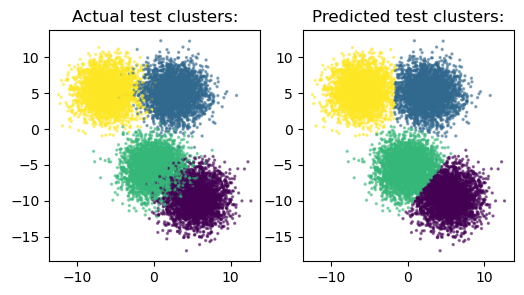

In [135]:
f, axs = plt.subplots(1,2,figsize=(6, 3))

axs[0].scatter(X_test[:, 0], X_test[:, 1], c=Y_test, alpha=0.5, s=2)
axs[0].set_title("Actual test clusters:")

axs[1].scatter(X_test[:, 0], X_test[:, 1], c=Y_predicted, alpha=0.5, s=2)
axs[1].set_title("Predicted test clusters:")

# Measuring accuracy

`sklearn` offers also many tools to measure the accuracy of our regression and clustering.
In this case, a suitable visualization of the goodness of our method is the
confusion matrix, that shows how many data points have been clustered wrongly

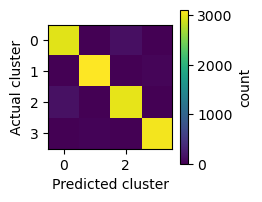

In [136]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, Y_predicted)

f, ax = plt.subplots(figsize=(2,2))
im = ax.imshow(conf_matrix)
ax.set(xlabel="Predicted cluster", ylabel="Actual cluster")
plt.colorbar(im, label="count")

(Note: sometimes we might have to match cluster IDs before computing the confusion matrix)

(Practicals 3.2.1)